<a href="https://colab.research.google.com/github/damikag/ML-GI_tract_Image_Classifier/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### [Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)

> HOSTED BY DRIVENDATA


---



# Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp -a 'drive/My Drive/UNI/Semester 7/Machine Learning/Assignments/DrivenData/inputs' .

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

import warnings; warnings.simplefilter('ignore')

In [3]:
df_train_set_labels = pd.read_csv('inputs/Train set labels.csv')
df_train_set_values = pd.read_csv('inputs/Train set values.csv')
df_train = df_train_set_values.merge(df_train_set_labels,on='id',how='left')

In [4]:
print("Shape of train set values: ", df_train_set_values.shape)
print("Shape of train set labels: ", df_train_set_labels.shape)
print("Shape of train set: ", df_train.shape)

Shape of train set values:  (59400, 40)
Shape of train set labels:  (59400, 2)
Shape of train set:  (59400, 41)


### Train Set Details

Columns, nonnull amounts and data types



In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Distribution in the Training Set

##### Data Distribution - Numerical Data

Kernel Density Estimate Plot

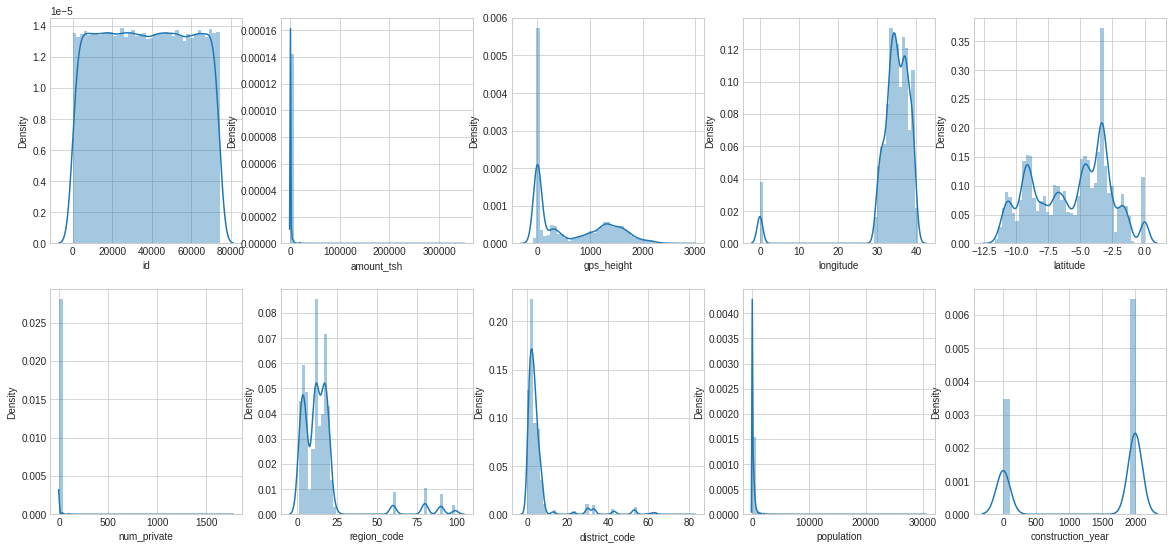

In [6]:
column_names_list = df_train.select_dtypes(include=np.number).columns.tolist()
number_of_columns=5
number_of_rows = len(column_names_list)-1/number_of_columns

plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(0,len(column_names_list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_train[column_names_list[i]],kde=True) 

Box Plot

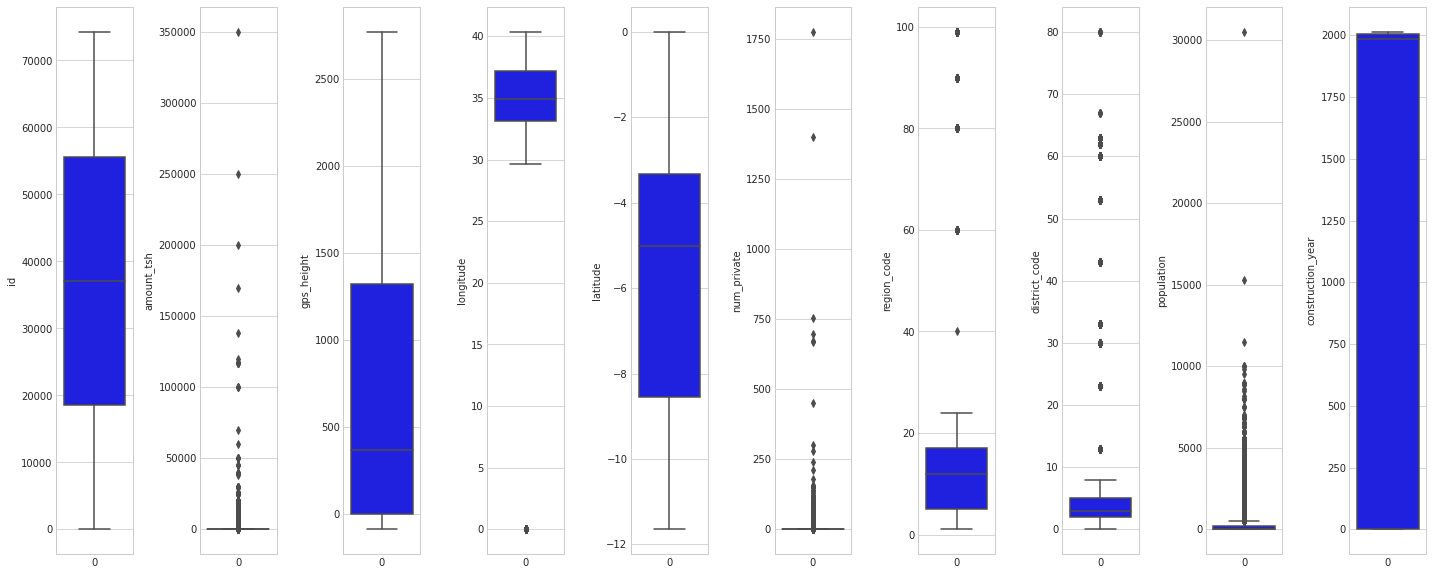

In [7]:
number_of_columns=12
number_of_rows = len(column_names_list)-1/number_of_columns
plt.figure(figsize=(number_of_columns*2,8*number_of_rows))

for i in range(0,len(column_names_list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    
    sns.set_style('whitegrid')
    ax = sns.boxplot(data=df_train[column_names_list[i]],color='blue',orient='v')
    ax.set_ylabel(column_names_list[i])
    
    plt.tight_layout()

In [8]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


##### Data Distribution - Categorical Data

In [9]:
tmp = df_train.select_dtypes(exclude=np.number).columns.tolist()[1:]
categorical_column_names = []

for item in tmp:
  if df_train[item].nunique()<= 20:
    categorical_column_names.append(item)

##### Countplots for Categorical Data

Drawn for a selected set of columns which has at most 20 unique categorical values.

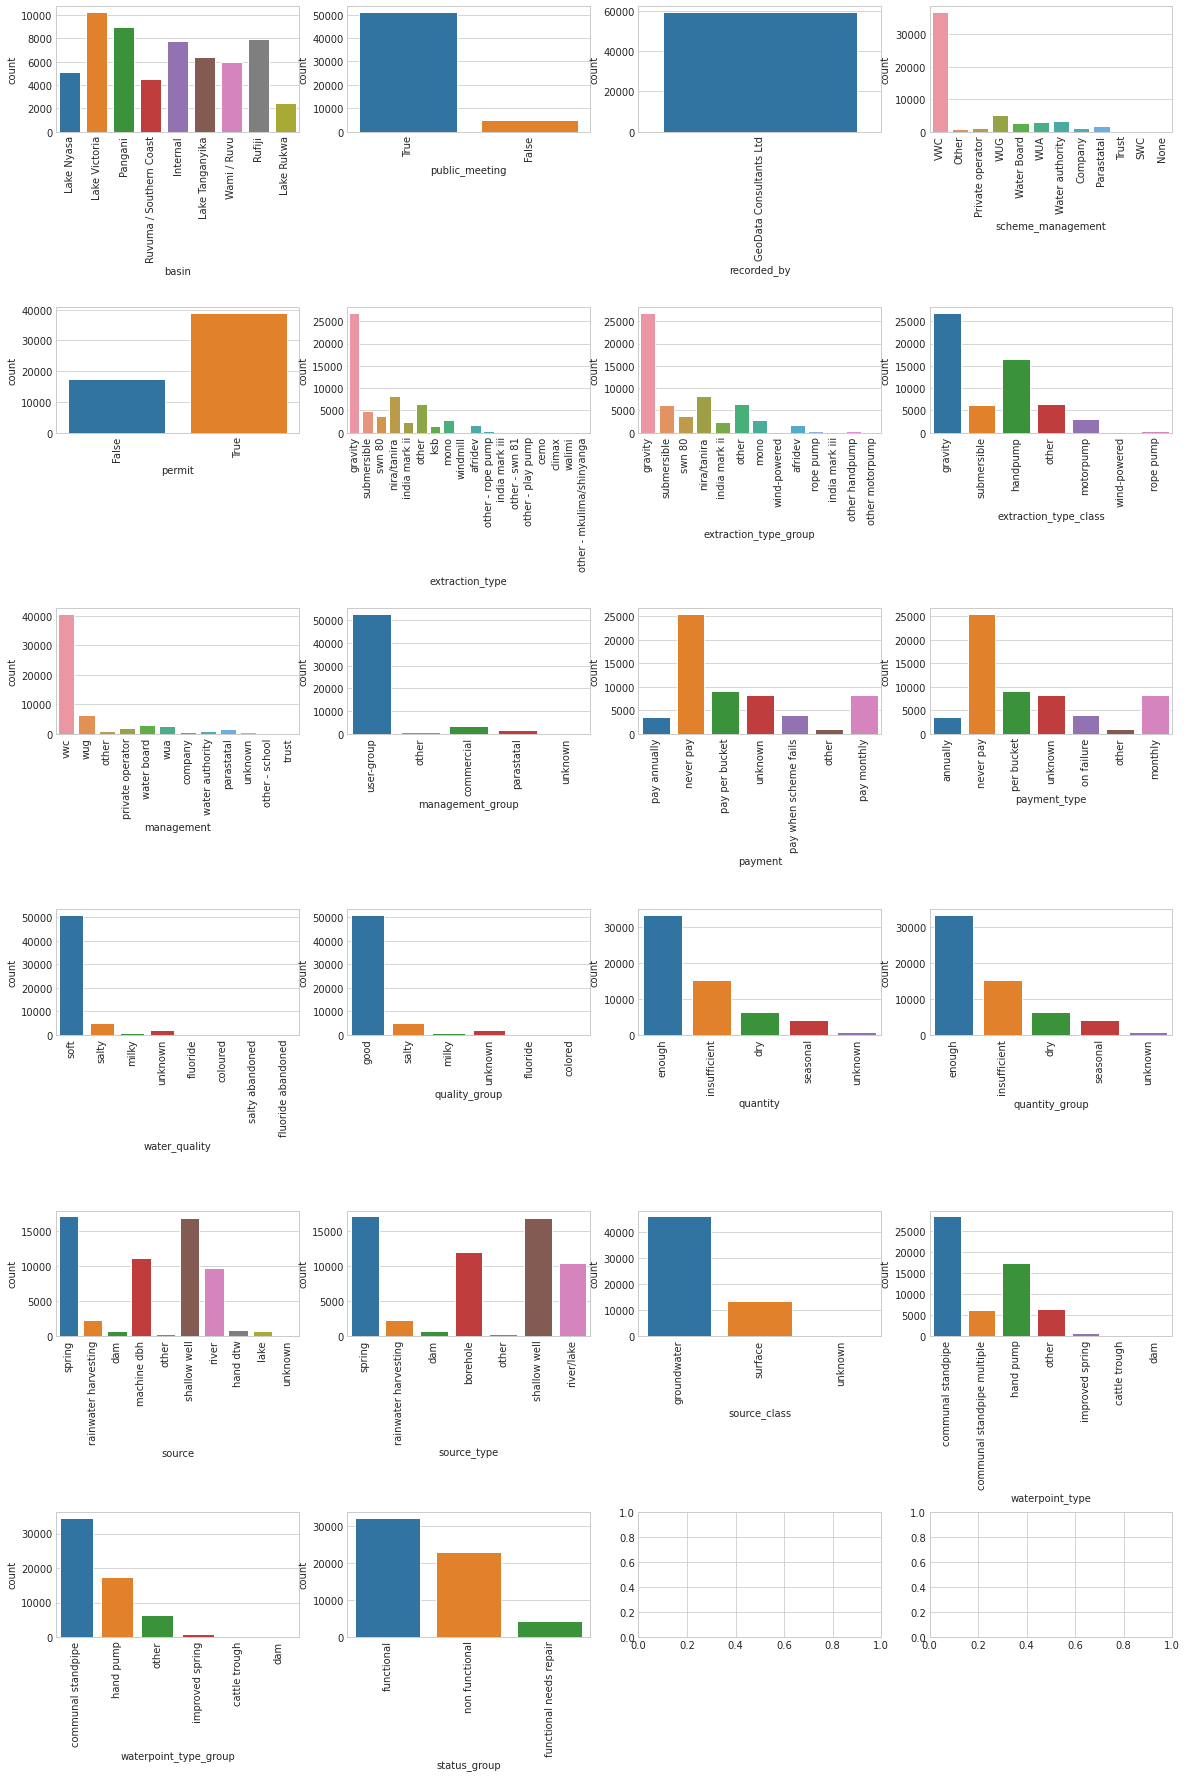

In [10]:
fig, ax = plt.subplots((len(categorical_column_names)+3)//4, 4, figsize=(20, 30))
fig.subplots_adjust(hspace=1.4)

for variable, subplot in zip(categorical_column_names, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Categorical Feature Distribution Amoung Target Classes

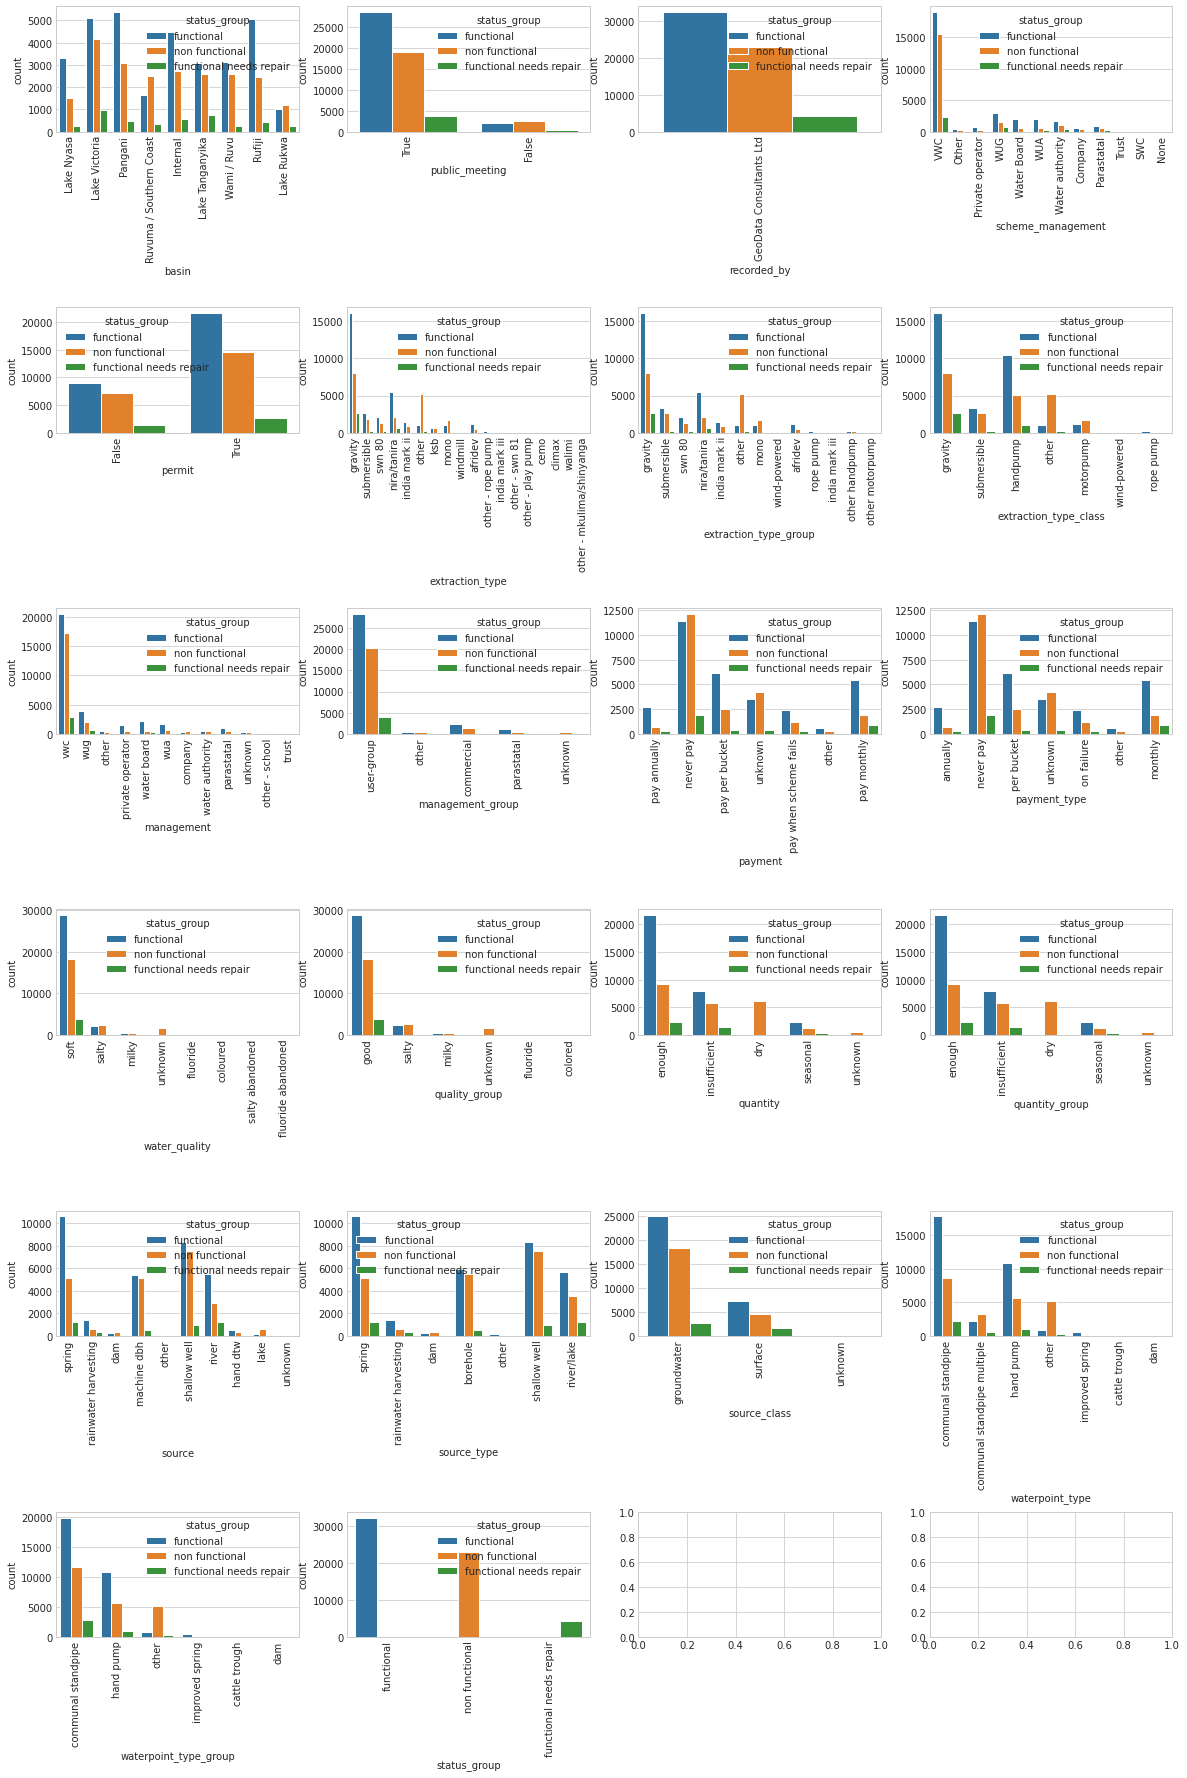

In [11]:
fig, ax = plt.subplots((len(categorical_column_names)+3)//4, 4, figsize=(20, 30))
fig.subplots_adjust(hspace=1.4)

for variable, subplot in zip(categorical_column_names, ax.flatten()):
    sns.countplot(x=variable, hue="status_group", data=df_train,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Distribution of the Target Varable in the Training Set

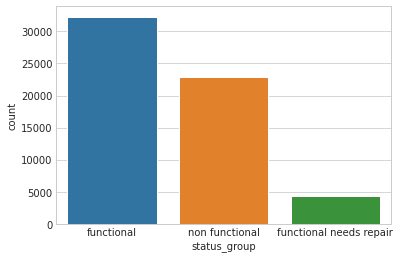

In [12]:
sns.countplot(df_train['status_group'])

### Feature Importance

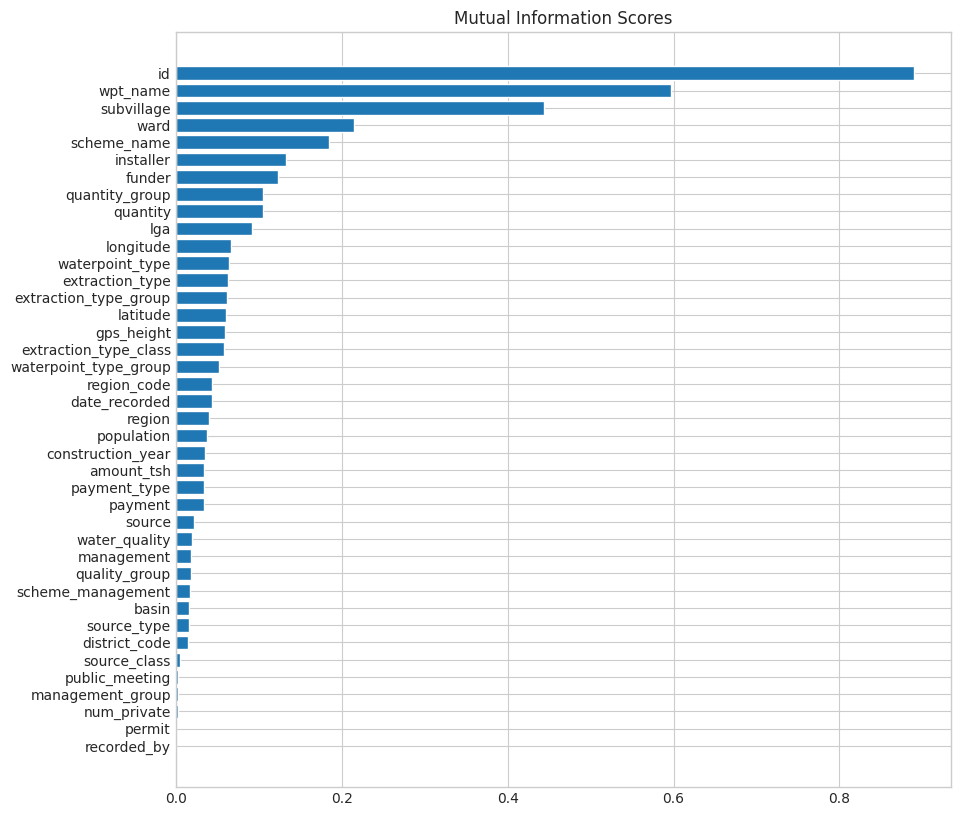

In [13]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = df_train.copy()
y = X.pop("status_group")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores  # show a few features with their MI scores

import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(10,10))
plot_mi_scores(mi_scores)


### Feature Correlation

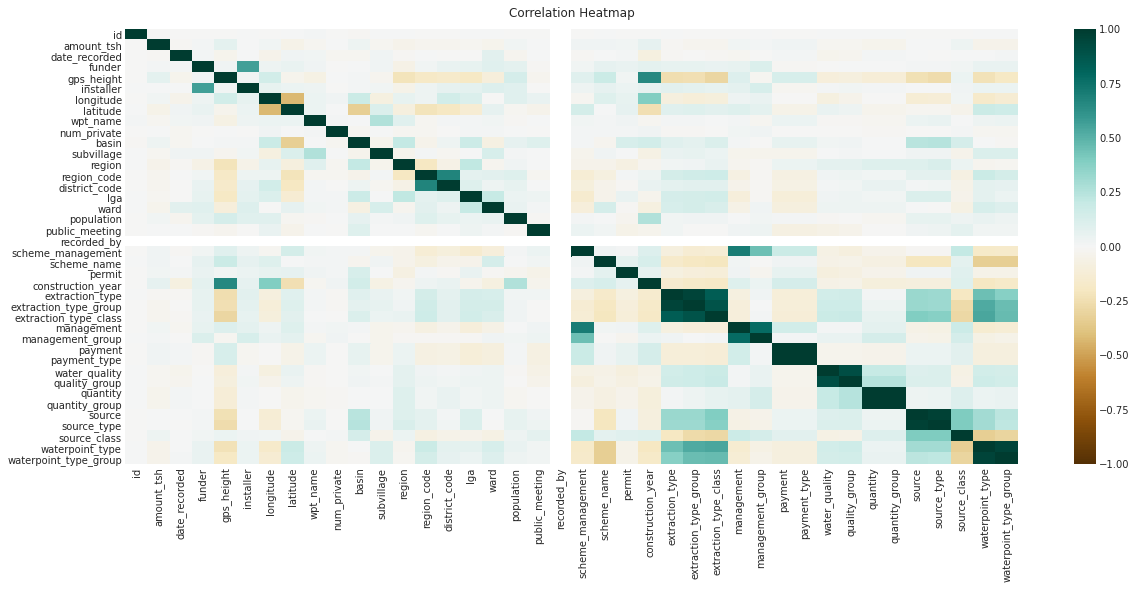

In [14]:
plt.figure(figsize=(20, 8))
# mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
# mask=mask,
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Unique Value Counts of Features

In [15]:
df_train.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

### Distribution of Water Pumps in 2D Dimension(lat,long)

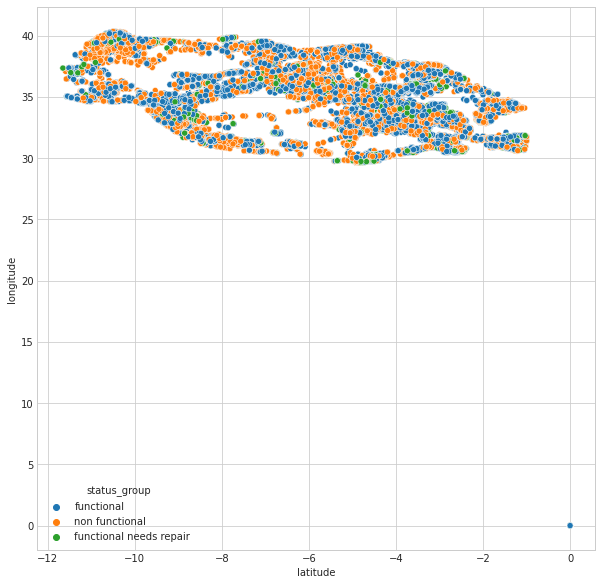

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='latitude',y='longitude',hue='status_group', data=df_train, ax=ax)

Insights From EDA



*   amount_tsh - Total static head has extreme outliers. Most of the values are closer to zero. But there are some values(max:350 000) that are extremely high which are possible outliers.
*   population has outliers and it is right-skewed.

*   Zeros in latitudes and longitudes are seemed to be outliers
*   gps_height has outliers around zero.
*   Construction_year has zeros which are outliers.
*   Amount of data available for each target class is not balanced. The functional class has more data and functional needs repair has limited data for training.
*   Some set of features shows a high correlation. 
    <br> Eg:-
    * district_code and region_code
    * extraction_type,	extraction_type_group,	extraction_type_class
    * extraction_tupe_class, waterpoint_type
    * installer, funder
    * construction_year, gps_height

    Most of them are of about the same feature with different interpretations.

*   Same columns are repeated under different column names. Eg: management, scheme_management
